In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Eklund, Mr. Hans Linus",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
train_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [12]:
train_data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [13]:
train_data[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
preprocessing_train_data = pd.read_csv("train.csv")
preprocessing_test_data = pd.read_csv("test.csv")

preprocessing_train_data['FamilySize'] = preprocessing_train_data['SibSp']+preprocessing_train_data['Parch']
preprocessing_test_data['FamilySize'] = preprocessing_test_data['SibSp']+preprocessing_test_data['Parch']

preprocessing_train_data.drop(['SibSp', 'Parch'],axis =1 , inplace = True)
preprocessing_test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

preprocessing_train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [15]:
preprocessing_train_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=True)

,FamilySize,Survived
7,7,0.000000
8,10,0.000000
5,5,0.136364
4,4,0.200000
0,0,0.303538
6,6,0.333333
1,1,0.552795
2,2,0.578431
3,3,0.724138


In [16]:
preprocessing_train_data.loc[preprocessing_train_data['FamilySize']<=4,'FamilySize'] = 0
preprocessing_train_data.loc[preprocessing_train_data['FamilySize']>4,'FamilySize'] = 1

preprocessing_test_data.loc[preprocessing_test_data['FamilySize']<=4,'FamilySize'] = 0
preprocessing_test_data.loc[preprocessing_test_data['FamilySize']>4,'FamilySize'] = 1

preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [17]:
preprocessing_train_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
0,0,0.396919
1,1,0.148936


In [18]:
preprocessing_train_data['Title'] = preprocessing_train_data.Name.str.extract('([A-Za-z]+)\.',expand=False)
preprocessing_test_data['Title'] = preprocessing_test_data.Name.str.extract('([A-Za-z]+)\.',expand=False)

preprocessing_train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
preprocessing_test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

pd.crosstab(preprocessing_train_data['Title'], preprocessing_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
preprocessing_train_data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)
preprocessing_test_data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)

preprocessing_train_data['Title'].replace(['Ms','Mlle','Mme'],'Miss',inplace=True)
preprocessing_test_data['Title'].replace(['Ms','Mlle','Mme'],['Miss','Miss','Miss'],inplace=True)

preprocessing_train_data['Title'].replace(['Mr','Miss','Mrs','Master','Rare'],[1,2,3,4,5],inplace=True)
preprocessing_test_data['Title'].replace(['Mr','Miss','Mrs','Master','Rare'],[1,2,3,4,5],inplace=True)

preprocessing_train_data['Title'].replace([None],[0],inplace=True)
preprocessing_test_data['Title'].replace([None],[0],inplace=True)

preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,0,1
1,2,1,1,female,38.0,71.2833,C,0,3
2,3,1,3,female,26.0,7.9250,S,0,2
3,4,1,1,female,35.0,53.1000,S,0,3
4,5,0,3,male,35.0,8.0500,S,0,1


In [20]:
preprocessing_train_data['Age'].replace([None],[30],inplace=True)
preprocessing_test_data['Age'].replace([None],[30],inplace=True)

In [21]:
preprocessing_train_data['Embarked'].replace([None],['S'],inplace=True)
preprocessing_test_data['Embarked'].replace([None],['S'],inplace=True)


preprocessing_train_data.replace(['female','male'],[0,1],inplace=True)
preprocessing_train_data.replace(['Q','C','S'],[0,1,2],inplace=True)


preprocessing_test_data.replace(['female','male'],[0,1],inplace=True)
preprocessing_test_data.replace(['Q','C','S'],[0,1,2],inplace=True)

preprocessing_train_data[['Sex','Embarked']].head()


,Sex,Embarked
0,1,2
1,0,1
2,0,2
3,0,2
4,1,2


In [22]:
preprocessing_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,1,22.0,7.2500,2,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,2,0,2
3,4,1,1,0,35.0,53.1000,2,0,3
4,5,0,3,1,35.0,8.0500,2,0,1


In [23]:
X_train = preprocessing_train_data.drop(['Survived','PassengerId'],axis=1)
Y_train = preprocessing_train_data['Survived']
X_test = preprocessing_test_data.drop(['PassengerId'],axis=1)

Accuracy:  81.14
Area Under the Curve:  0.87


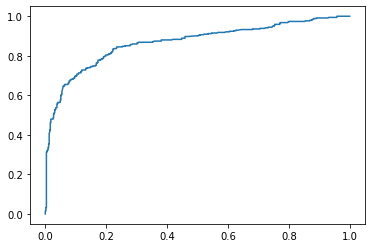

In [24]:
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

accuracy = classifier.score(X_train,Y_train)*100
Y_train_pred = classifier.predict_proba(X_train)[:,1]

FPR,TPR, thresholds = roc_curve(Y_train,Y_train_pred)
AUC = roc_auc_score(Y_train,Y_train_pred)


plt.plot(FPR,TPR)

print("Accuracy: ","{0:.2f}".format(accuracy))
print("Area Under the Curve: ","{0:.2f}".format(AUC))

In [25]:
predict = classifier.predict(X_test)
predict = np.round(predict)

result = test_data.copy()
result['PREDICTION'] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [26]:
result.head()
result.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


Accuracy:  68.46
Area Under the Curve:  0.77


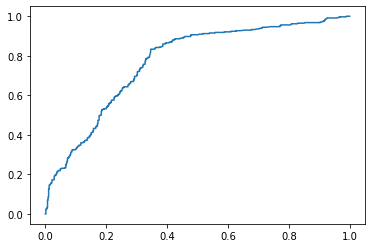

In [27]:
classifier = SVC(probability=True)

classifier.fit(X_train,Y_train)

accuracy = classifier.score(X_train,Y_train)*100
Y_train_pred = classifier.predict_proba(X_train)[:,1]

FPR,TPR, thresholds = roc_curve(Y_train,Y_train_pred)
AUC = roc_auc_score(Y_train,Y_train_pred)


plt.plot(FPR,TPR)

print("Accuracy: ","{0:.2f}".format(accuracy))
print("Area Under the Curve: ","{0:.2f}".format(AUC))

In [28]:
predict = classifier.predict(X_test)
predict = np.round(predict)

result = test_data.copy()
result['PREDICTION'] = predict
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTION
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
